In [53]:
import torch
import torch.nn as nn
import dgl
import dgl.function as fn
from ogb.nodeproppred import DglNodePropPredDataset, Evaluator
import numpy as np

import matplotlib.pyplot as plt
import networkx as nx

In [54]:
dataset = DglNodePropPredDataset(name="ogbn-proteins")  
evaluator = Evaluator(name="ogbn-proteins")

In [55]:
dataset

DglNodePropPredDataset(1)

In [56]:
graph, labels = dataset[0]

In [57]:
labels

tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])

In [58]:
graph

Graph(num_nodes=132534, num_edges=79122504,
      ndata_schemes={'species': Scheme(shape=(1,), dtype=torch.int64)}
      edata_schemes={'feat': Scheme(shape=(8,), dtype=torch.float32)})

In [59]:
graph.ndata

{'species': tensor([[3702],
        [3702],
        [3702],
        ...,
        [7955],
        [7955],
        [7955]])}

In [60]:
graph.edata

{'feat': tensor([[0.5010, 0.0010, 0.0010,  ..., 0.0010, 0.0010, 0.0010],
        [0.5010, 0.0010, 0.0010,  ..., 0.0010, 0.0010, 0.0010],
        [0.5010, 0.0010, 0.0010,  ..., 0.0010, 0.0010, 0.0010],
        ...,
        [0.0010, 0.0010, 0.0010,  ..., 0.0010, 0.0010, 0.4510],
        [0.0010, 0.0010, 0.0010,  ..., 0.0010, 0.0010, 0.1620],
        [0.0010, 0.0010, 0.0010,  ..., 0.0010, 0.0010, 0.1620]])}

In [61]:
graph.ntypes

['_N']

In [62]:
graph.etypes

['_E']

In [63]:
graph.canonical_etypes

[('_N', '_E', '_N')]

In [64]:
graph.ndata["labels"] = labels.float()
graph

Graph(num_nodes=132534, num_edges=79122504,
      ndata_schemes={'species': Scheme(shape=(1,), dtype=torch.int64), 'labels': Scheme(shape=(112,), dtype=torch.float32)}
      edata_schemes={'feat': Scheme(shape=(8,), dtype=torch.float32)})

In [65]:
splitted_idx = dataset.get_idx_split()
train_idx, val_idx, test_idx = splitted_idx["train"], splitted_idx["valid"], splitted_idx["test"]

In [66]:
graph.subgraph(train_idx)

Graph(num_nodes=86619, num_edges=40846716,
      ndata_schemes={'species': Scheme(shape=(1,), dtype=torch.int64), 'labels': Scheme(shape=(112,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'feat': Scheme(shape=(8,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)})

In [67]:
graph.subgraph(val_idx)

Graph(num_nodes=21236, num_edges=11944674,
      ndata_schemes={'species': Scheme(shape=(1,), dtype=torch.int64), 'labels': Scheme(shape=(112,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'feat': Scheme(shape=(8,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)})

In [68]:
graph.subgraph(test_idx)

Graph(num_nodes=24679, num_edges=14116454,
      ndata_schemes={'species': Scheme(shape=(1,), dtype=torch.int64), 'labels': Scheme(shape=(112,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'feat': Scheme(shape=(8,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)})

In [69]:
np.unique(graph.ndata['species'], return_counts=True)

(array([  3702,   4932,   6239,   7227,   7955,   9606,  10090, 511145],
       dtype=int64),
 array([25449,  6568, 18108, 13015, 24679, 19354, 21236,  4125],
       dtype=int64))

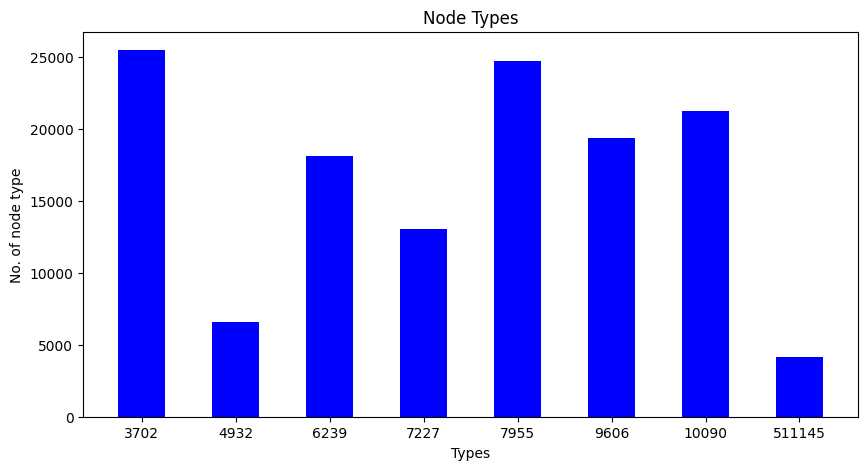

In [70]:
types, values = np.unique(graph.ndata['species'], return_counts=True)
types = [str(type) for type in types]

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(types, values, color ='b',
        width = 0.5)
 
plt.xlabel("Types")
plt.ylabel("No. of node type")
plt.title("Node Types")
plt.show()

In [71]:
graph.edata['feat'][:,1].shape

torch.Size([79122504])

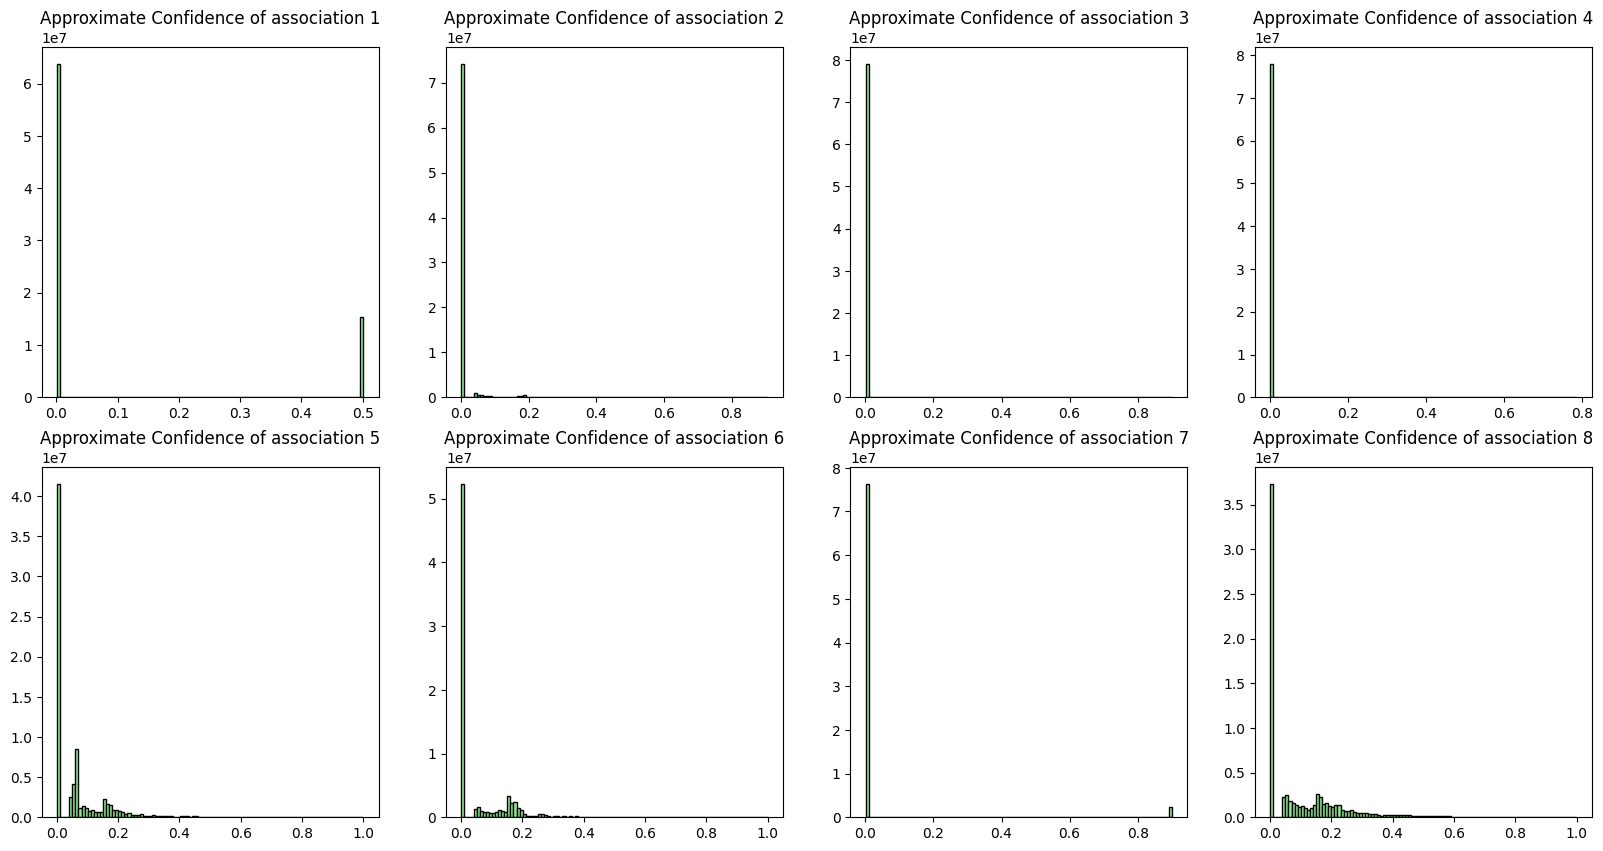

In [72]:
figure = plt.figure(figsize=(20, 10))
for i in range(8):
    types, values = np.unique(labels[:,i], return_counts=True)
    types = [str(type) for type in types]

    ax = figure.add_subplot(2, 4, i + 1 ,title='Approximate Confidence of association ' + str(i+1), )
    # creating the bar plot
    ax.hist(np.asarray(graph.edata['feat'][:,i]), color='lightgreen', ec='black', bins=100)

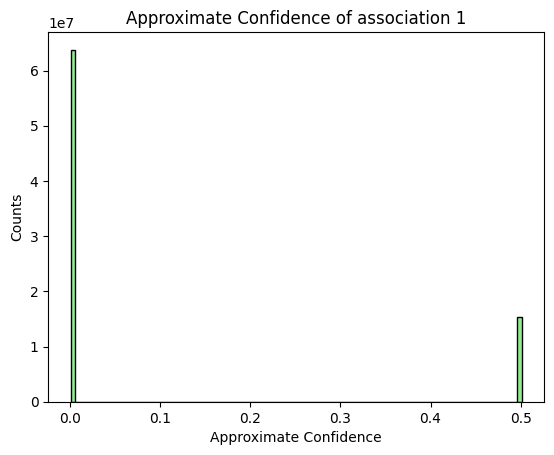

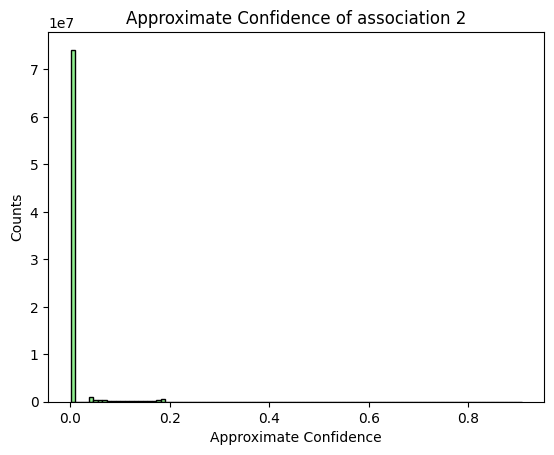

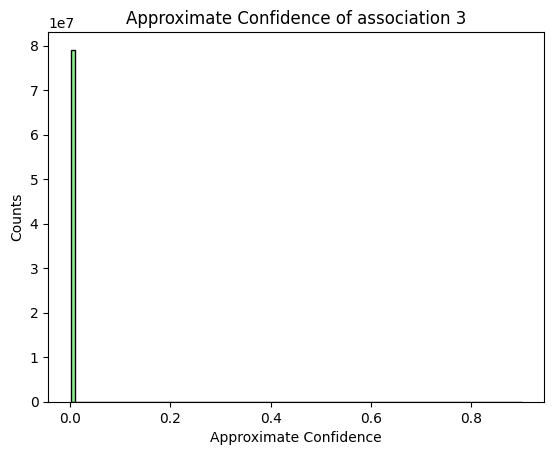

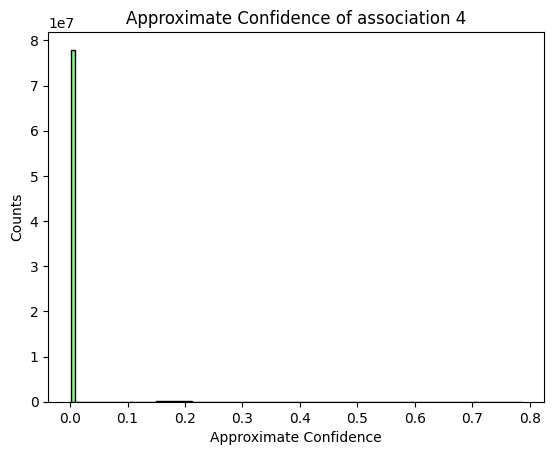

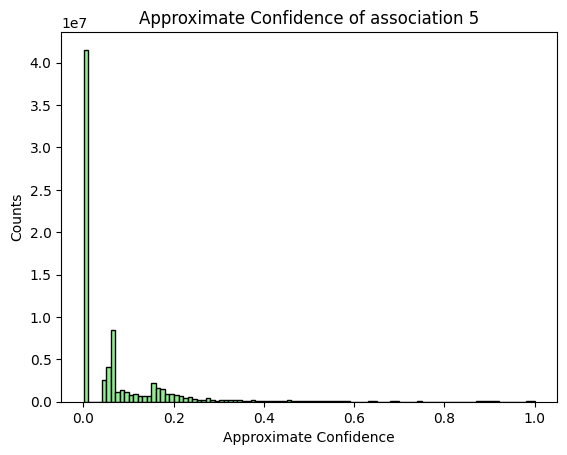

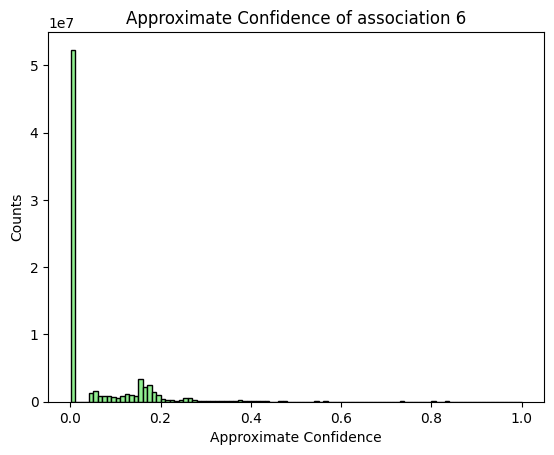

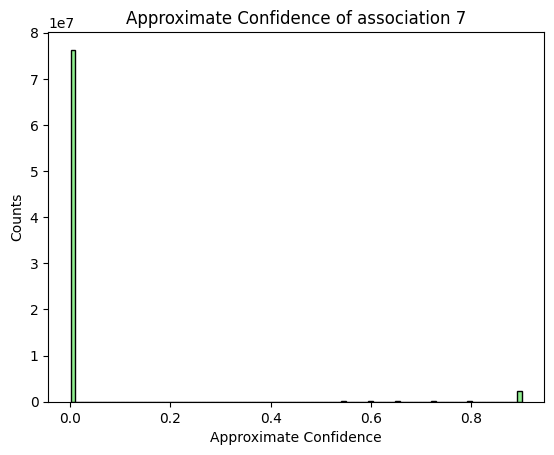

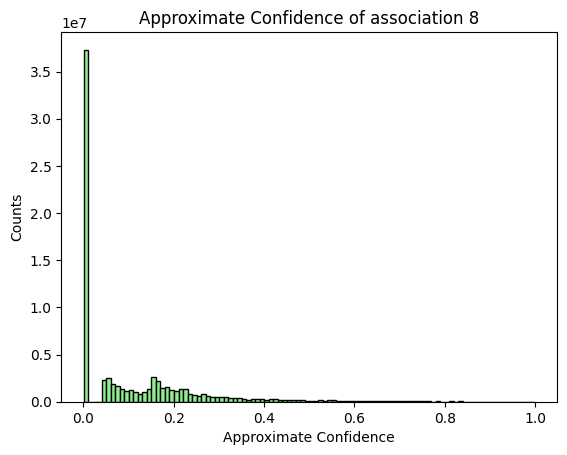

In [73]:
for i in range(8):
    # matplotlib histogram
    plt.hist(np.asarray(graph.edata['feat'][:,i]), color='lightgreen', ec='black', bins=100)

    # Add labels
    plt.title('Approximate Confidence of association ' + str(i+1))
    plt.xlabel('Approximate Confidence')
    plt.ylabel('Counts')
    plt.show()

In [74]:
def random_subg (graph, node_type, num_each_type):
    rand_indx = []
    types_of_node = graph.ndata[node_type].reshape(-1,)
    for uni in np.unique(types_of_node):
        indx_uni = (types_of_node == uni).nonzero().reshape(-1,)
        indx_indx = np.random.randint(len(indx_uni), size=num_each_type)
        rand_indx.extend(indx_uni[indx_indx])
    return(torch.as_tensor(rand_indx))

In [75]:
random_subg(graph, 'species', 2000)

tensor([ 7892,  4660, 17818,  ..., 86250, 82586, 85660])

In [76]:
sub_graph = graph.subgraph(random_subg(graph, 'species', 10))
sub_graph

Graph(num_nodes=80, num_edges=50,
      ndata_schemes={'species': Scheme(shape=(1,), dtype=torch.int64), 'labels': Scheme(shape=(112,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'feat': Scheme(shape=(8,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)})

In [77]:
nx_g = dgl.to_networkx(sub_graph, node_attrs=['species'], edge_attrs=['feat'])

In [78]:
nx_g

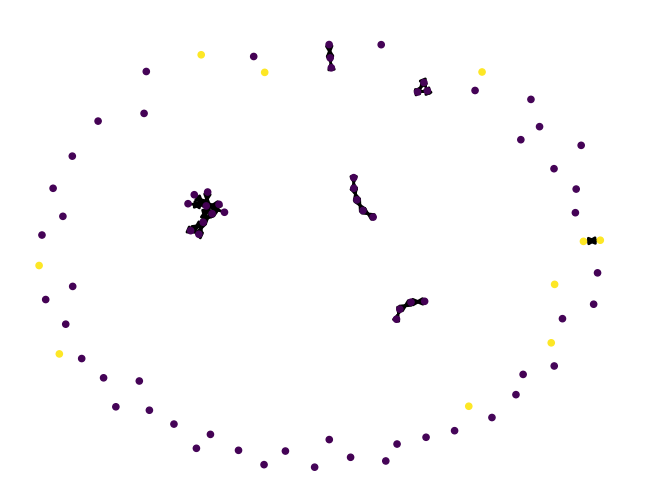

In [79]:
nx.draw(nx_g, width=2 , node_size= 20, node_color= sub_graph.ndata['species'])

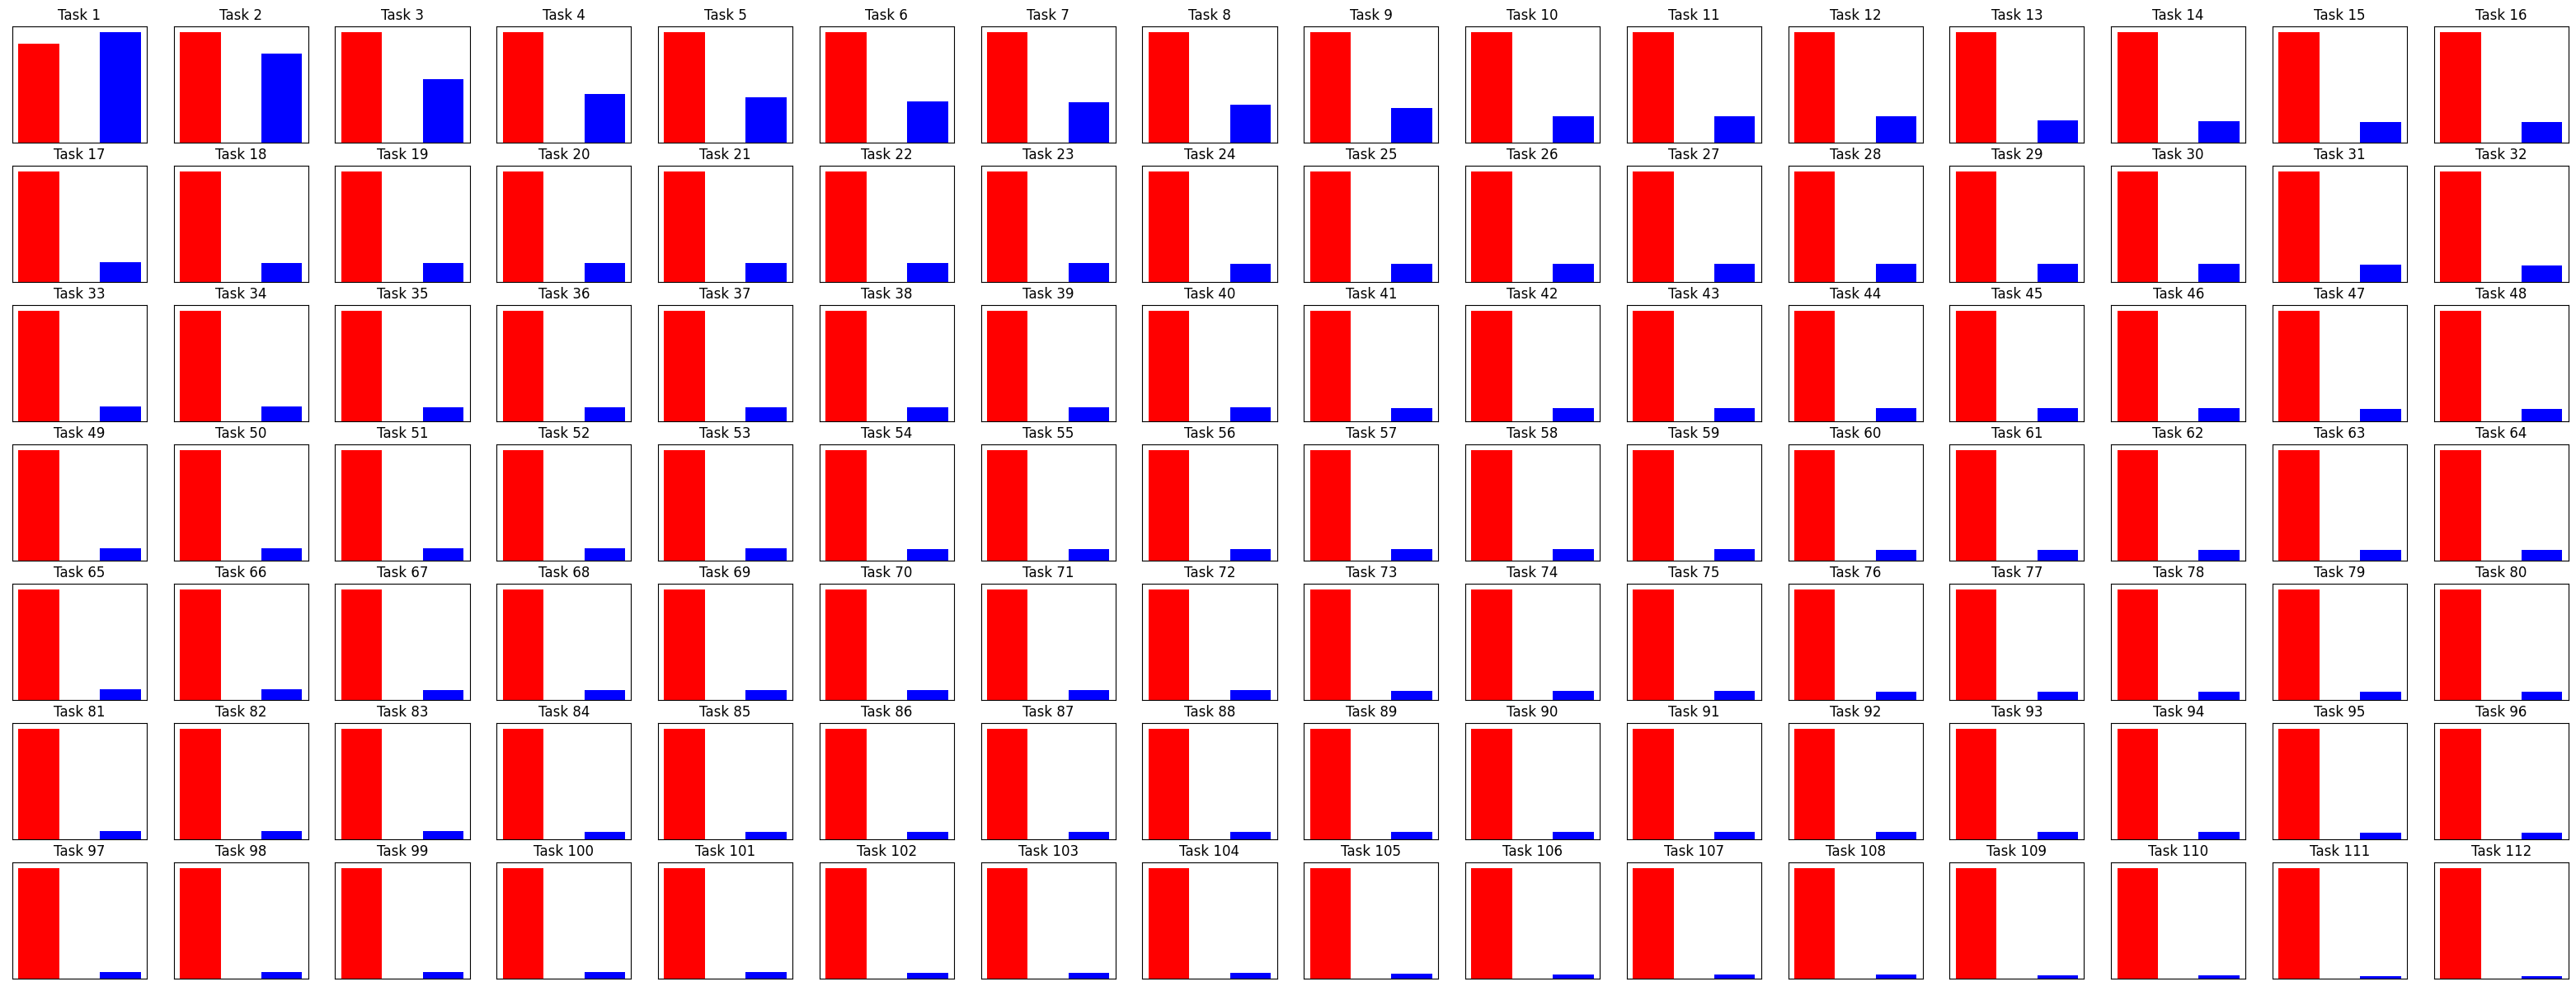

In [80]:
figure = plt.figure(figsize=(40, 15))
for i in range(112):
    types, values = np.unique(labels[:,i], return_counts=True)
    types = [str(type) for type in types]

    ax = figure.add_subplot(7, 16, i + 1 ,title="Task " + str(i+1) , xticks=[], yticks=[])
    # creating the bar plot
    ax.bar(types, values, color =['r', 'b'],
            width = 0.5)
    

In [81]:
def pre_process(graph, n_type, e_feat):
    # convert types to 0...n
    map_types = dict(zip(np.unique(graph.ndata[n_type]), range(0,8)))
    new_types = torch.as_tensor([map_types[x[0]] for x in np.asarray(graph.ndata[n_type])]).reshape(-1,)
    one_hot_types = torch.nn.functional.one_hot(new_types, ).float()
    # save onehotencoder
    graph.srcdata.update({"n_type": one_hot_types})
    # print(graph)
    # print(graph.ndata)

    graph.update_all(fn.copy_e(e_feat, 'em'), fn.mean("em", "e_feat"))
    # print(graph)
    # print(graph.ndata)
    graph.update_all(fn.copy_u('n_type', 'nm'), fn.mean("nm", "n_feat"))
    # print(graph)
    # print(graph.ndata)
    graph.srcdata.update({"feat": torch.concat([graph.ndata['n_type'], graph.ndata['e_feat'], graph.ndata['n_feat']], dim=-1)})
    # print(graph)
    # print(graph.ndata)
    del graph.ndata['e_feat'], graph.ndata['n_feat']
    print(graph)
    print(graph.ndata)

    # graph.update_all(fn.copy_e(e_feat, 'em'), fn.mean("em", "feat"))

    return(graph)      

In [82]:
sub_graph = pre_process(sub_graph, 'species', 'feat')

Graph(num_nodes=80, num_edges=50,
      ndata_schemes={'species': Scheme(shape=(1,), dtype=torch.int64), 'labels': Scheme(shape=(112,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64), 'n_type': Scheme(shape=(8,), dtype=torch.float32), 'feat': Scheme(shape=(24,), dtype=torch.float32)}
      edata_schemes={'feat': Scheme(shape=(8,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)})
{'species': tensor([[  3702],
        [  3702],
        [  3702],
        [  3702],
        [  3702],
        [  3702],
        [  3702],
        [  3702],
        [  3702],
        [  3702],
        [  4932],
        [  4932],
        [  4932],
        [  4932],
        [  4932],
        [  4932],
        [  4932],
        [  4932],
        [  4932],
        [  4932],
        [  6239],
        [  6239],
        [  6239],
        [  6239],
        [  6239],
        [  6239],
        [  6239],
        [  6239],
        [  6239],
        [  6239],
        [  7227],
        [  7

In [83]:
graph = pre_process(graph, 'species', 'feat')

Graph(num_nodes=132534, num_edges=79122504,
      ndata_schemes={'species': Scheme(shape=(1,), dtype=torch.int64), 'labels': Scheme(shape=(112,), dtype=torch.float32), 'n_type': Scheme(shape=(8,), dtype=torch.float32), 'feat': Scheme(shape=(24,), dtype=torch.float32)}
      edata_schemes={'feat': Scheme(shape=(8,), dtype=torch.float32)})
{'species': tensor([[3702],
        [3702],
        [3702],
        ...,
        [7955],
        [7955],
        [7955]]), 'labels': tensor([[1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), 'n_type': tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), 'feat':

In [84]:
from sklearn.manifold import TSNE

def visualize(embs, color, title):
    xs, ys = zip(*TSNE().fit_transform(embs.detach().numpy()))

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(xs, ys, s=25, c=color, cmap="Set2")
    plt.title('Visualization using 2-componenet of TSNE / '+ title)
    plt.show()

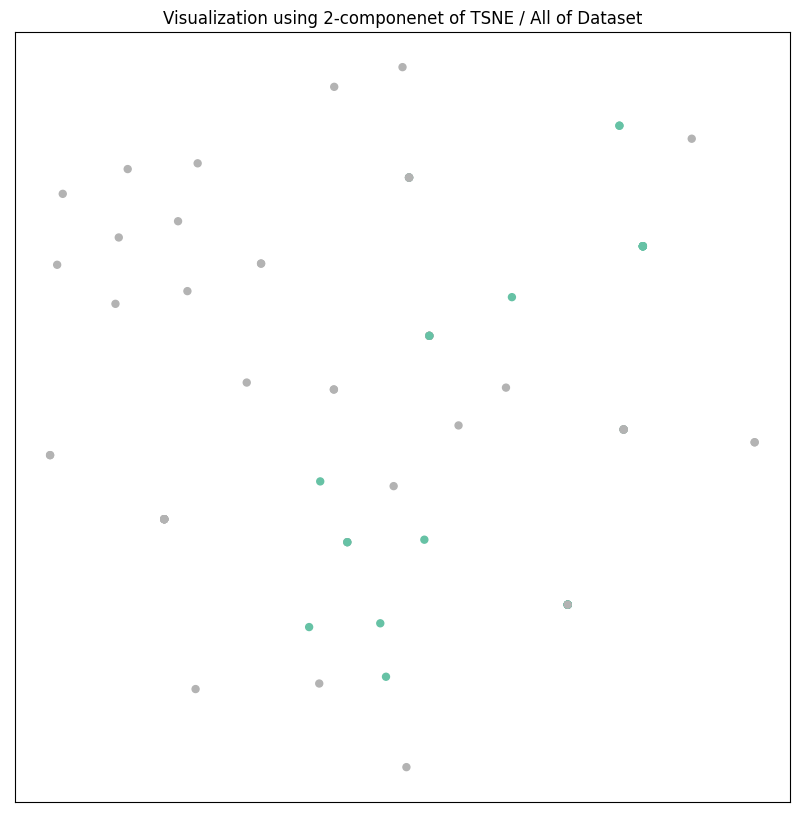

In [85]:
visualize(sub_graph.ndata["feat"], color=sub_graph.ndata["labels"][:,0], title = "All of Dataset")

In [86]:
train_graph = graph.subgraph(train_idx[random_subg(graph.subgraph(train_idx), 'species', 2000)])
train_graph

Graph(num_nodes=12000, num_edges=757216,
      ndata_schemes={'species': Scheme(shape=(1,), dtype=torch.int64), 'labels': Scheme(shape=(112,), dtype=torch.float32), 'n_type': Scheme(shape=(8,), dtype=torch.float32), 'feat': Scheme(shape=(24,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'feat': Scheme(shape=(8,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)})

In [87]:
np.unique(train_graph.ndata['species'])

array([  3702,   4932,   6239,   7227,   9606, 511145], dtype=int64)

In [88]:
val_graph = graph.subgraph(val_idx[random_subg(graph.subgraph(val_idx), 'species', 2000)])
val_graph

Graph(num_nodes=2000, num_edges=101565,
      ndata_schemes={'species': Scheme(shape=(1,), dtype=torch.int64), 'labels': Scheme(shape=(112,), dtype=torch.float32), 'n_type': Scheme(shape=(8,), dtype=torch.float32), 'feat': Scheme(shape=(24,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'feat': Scheme(shape=(8,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)})

In [89]:
np.unique(val_graph.ndata['species'])

array([10090], dtype=int64)

In [90]:
test_graph = graph.subgraph(test_idx[random_subg(graph.subgraph(test_idx), 'species', 2000)])
test_graph

Graph(num_nodes=2000, num_edges=92125,
      ndata_schemes={'species': Scheme(shape=(1,), dtype=torch.int64), 'labels': Scheme(shape=(112,), dtype=torch.float32), 'n_type': Scheme(shape=(8,), dtype=torch.float32), 'feat': Scheme(shape=(24,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'feat': Scheme(shape=(8,), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)})

In [91]:
np.unique(test_graph.ndata['species'])

array([7955], dtype=int64)

In [92]:
class my_GCN (nn.Module):
    def __init__(self, num_fea, num_classes, num_layers):
        super(my_GCN, self).__init__()

        self.num_layers = num_layers
        # self.W_GCN = nn.Linear(num_fea, num_fea, bias=True)
        self.list_W_GCN = nn.ModuleList([nn.Sequential(nn.Linear(num_fea, num_fea, bias=True),nn.ReLU(),) for _ in range(num_layers)])

        self.classifcation = nn.Sequential(
            nn.Linear(num_fea, 512, bias=True),
            nn.ReLU(),
            nn.Linear(512, 256, bias=True),
            nn.ReLU(),
            nn.Linear(256, 128, bias=True),
            nn.ReLU(),
            nn.Linear(128, num_classes, bias=True),
            nn.Sigmoid(),
        )
    
    def forward(self, graph):
        with graph.local_scope():
            for i in range(self.num_layers):
                # Message
                prop_src_fc = self.list_W_GCN[i](graph.ndata['feat'])
                graph.srcdata.update({"feat": prop_src_fc})
                # Aggregation
                graph.update_all(fn.copy_u("feat", "m"), fn.mean("m", "feat"))
                
            # Classifcation
            logits = self.classifcation(graph.ndata['feat'])

        return(logits)

In [93]:
from sklearn.metrics import roc_auc_score

class Leaning_Evaluation_node(torch.nn.Module):
    def __init__(
        self,
        graph,
        val_graph,
        model,
        learning_rate=0.01,
        n_epochs=100,
        ):
        super().__init__()
        self.graph = graph
        self.val_graph = val_graph
        #self.train_graph = 
        self.model = model
        self.splitted_idx = splitted_idx
        self.optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
        self.criterion = torch.nn.CrossEntropyLoss()
        self.n_epochs = n_epochs
        
    # This method do train step for each epoch
    def train_one_epoch(self):
        # start training model
        self.model.train()
        # initial optimizer is zero
        self.optimizer.zero_grad()
        # Forward Propagation
        logits = self.model(self.graph)
        logits_val = self.model(self.val_graph)


        # Compute ROC for train and validation dataset
        roc_train_score = evaluator.eval({"y_pred": logits, "y_true": self.graph.ndata['labels']})["rocauc"]
        roc_val_score = evaluator.eval({"y_pred": logits_val, "y_true": self.val_graph.ndata['labels']})["rocauc"]


        # Compute loss for train and validation dataset
        train_loss = self.criterion(logits, self.graph.ndata['labels'])
        validation_loss = self.criterion(logits_val, self.val_graph.ndata['labels'])

        # Compute Accuracy for train and validation dataset
        pred = torch.where(logits > 0.5, 1.0, 0.0)
        pred_val = torch.where(logits_val > 0.5, 1.0, 0.0)
        # train_correct = pred[self.data.train_mask] == self.data.y[self.data.train_mask]
        # train_acc = int(train_correct.sum()) / int(self.data.train_mask.sum())
        total_ = self.graph.ndata['labels'].shape[0] * self.graph.ndata['labels'].shape[1]
        train_acc = float((pred == self.graph.ndata['labels']).count_nonzero() / total_)
        # validation_correct = pred[self.data.val_mask] == data.y[self.data.val_mask]
        # validation_acc = int(validation_correct.sum()) / int(self.data.val_mask.sum())
        total_val = self.val_graph.ndata['labels'].shape[0] * self.val_graph.ndata['labels'].shape[1]
        validation_acc = float((pred_val == self.val_graph.ndata['labels']).count_nonzero() / total_val)
        # Backward Propagation
        train_loss.backward()
        # Optimaze NN weights
        self.optimizer.step()
        return train_loss, train_acc, validation_loss, validation_acc, roc_train_score, roc_val_score

    def train(self):
        # Lists to display results
        list_train_loss, list_train_acc, list_val_loss, list_val_acc, list_train_roc, list_val_roc = [], [], [], [], [], []
        # call train step for each epoch and print results
        for epoch in range(1, self.n_epochs+1):
            train_loss, train_acc, validation_loss, validation_acc, train_roc, val_roc = self.train_one_epoch()
            list_train_loss.append(float(train_loss.detach()))
            list_train_acc.append(train_acc)
            list_val_loss.append(float(validation_loss.detach()))
            list_val_acc.append(validation_acc)
            list_train_roc.append(train_roc)
            list_val_roc.append(val_roc)
            print(f'Epoch: {epoch:03d}, Trian Loss: {train_loss:.4f}, Trian Accuracy: {train_acc:.4f}, Validation Loss: {validation_loss:.4f}, Validation Accuracy: {validation_acc:.4f}')
            print(f'Epoch: {epoch:03d}, Trian AUC score: {train_roc:.4f}, Validation AUC score: {val_roc:.4f}')
            print()
            
        return list_train_loss, list_train_acc, list_val_loss, list_val_acc, list_train_roc, list_val_roc 

    # This method predicts inputs
    def test(self, test_graph):
        self.model.eval()

        logits_test = self.model(test_graph)

        # Compute ROC for test dataset
        roc_test_score = evaluator.eval({"y_pred": logits_test, "y_true": test_graph.ndata['labels']})["rocauc"]

        # Compute loss for train and validation dataset
        test_loss = self.criterion(logits_test, test_graph.ndata['labels'])

        # Compute Accuracy for train and validation dataset
        pred_test = torch.where(logits_test > 0.5, 1.0, 0.0)
        total_ = test_graph.ndata['labels'].shape[0] * test_graph.ndata['labels'].shape[1]
        test_acc = float((pred_test == test_graph.ndata['labels']).count_nonzero() / total_)


        return test_acc, test_loss.detach(), roc_test_score, logits_test.detach()

In [94]:
# Use CPU for processing
device = torch.device('cpu')
data_train = train_graph.to(device)
data_val = val_graph.to(device)


In [95]:
# make and display model
gcn_model = my_GCN(24, 112, 5)
print(gcn_model)

my_GCN(
  (list_W_GCN): ModuleList(
    (0-4): 5 x Sequential(
      (0): Linear(in_features=24, out_features=24, bias=True)
      (1): ReLU()
    )
  )
  (classifcation): Sequential(
    (0): Linear(in_features=24, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=112, bias=True)
    (7): Sigmoid()
  )
)


In [96]:
total_params = sum(p.numel() for p in gcn_model.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 194472


In [97]:
# for name, param in gcn_model.named_parameters():
#     if param.requires_grad:
#         print (name, param)

In [98]:
evaluate_GCN = Leaning_Evaluation_node(graph=graph.subgraph(train_idx),
                                    val_graph = graph.subgraph(val_idx),
                                   model = gcn_model,
                                   learning_rate=0.01,
                                   n_epochs=5,
                                   )
list_train_loss, list_train_acc, list_val_loss, list_val_acc, list_train_roc, list_val_roc = evaluate_GCN.train()

Epoch: 001, Trian Loss: 66.8528, Trian Accuracy: 0.5425, Validation Loss: 89.0600, Validation Accuracy: 0.5333
Epoch: 001, Trian AUC score: 0.5009, Validation AUC score: 0.5004

Epoch: 002, Trian Loss: 66.5644, Trian Accuracy: 0.6393, Validation Loss: 88.7602, Validation Accuracy: 0.6342
Epoch: 002, Trian AUC score: 0.4716, Validation AUC score: 0.4869

Epoch: 003, Trian Loss: 65.7656, Trian Accuracy: 0.6857, Validation Loss: 87.9882, Validation Accuracy: 0.6736
Epoch: 003, Trian AUC score: 0.4560, Validation AUC score: 0.4804

Epoch: 004, Trian Loss: 65.0730, Trian Accuracy: 0.6995, Validation Loss: 87.5126, Validation Accuracy: 0.6867
Epoch: 004, Trian AUC score: 0.4602, Validation AUC score: 0.4886

Epoch: 005, Trian Loss: 64.9837, Trian Accuracy: 0.7127, Validation Loss: 87.5246, Validation Accuracy: 0.6984
Epoch: 005, Trian AUC score: 0.4603, Validation AUC score: 0.4895



In [99]:
def display_train_curve (list_train_acc, list_val_acc, list_train_loss, list_val_loss, list_train_roc, list_val_roc, epoch):
    plt.figure(figsize=(12,6),linewidth = 7, edgecolor="whitesmoke") 
    # plot Accuracy for Train dataset and Validation dataset
    plt.plot(list(range(1, epoch+1)), list_train_acc, color='orange',marker=".")
    plt.plot(list(range(1, epoch+1)), list_val_acc, color='b', marker=".")
    plt.legend(['Train Accuracy','Validation Accuracy'])
    plt.grid(True)
    plt.xlabel("Number of Epochs")
    plt.ylabel("Value")
    plt.suptitle('Accuracy', size=16, y=0.927)
    plt.show()

    plt.figure(figsize=(12,6),linewidth = 7, edgecolor="whitesmoke") 
    # plot Loss for Train dataset and Validation dataset
    plt.plot(list(range(1, epoch+1)), list_train_loss,'r')  
    plt.plot(list(range(1, epoch+1)), list_val_loss,'g')
    plt.legend(['Train Loss','Validation Loss'])
    plt.grid(True)
    plt.xlabel("Number of Epochs")
    plt.ylabel("Value")
    plt.suptitle('Loss', size=16, y=0.927)
    plt.show()

    plt.figure(figsize=(12,6),linewidth = 7, edgecolor="whitesmoke") 
    # plot ROC for Train dataset and Validation dataset
    plt.plot(list(range(1, epoch+1)), list_train_roc,'r', marker=".")  
    plt.plot(list(range(1, epoch+1)), list_val_roc,'g', marker=".")
    plt.legend(['Train ROC','Validation ROC'])
    plt.grid(True)
    plt.xlabel("Number of Epochs")
    plt.ylabel("Value")
    plt.suptitle('ROC', size=16, y=0.927)
    plt.show()

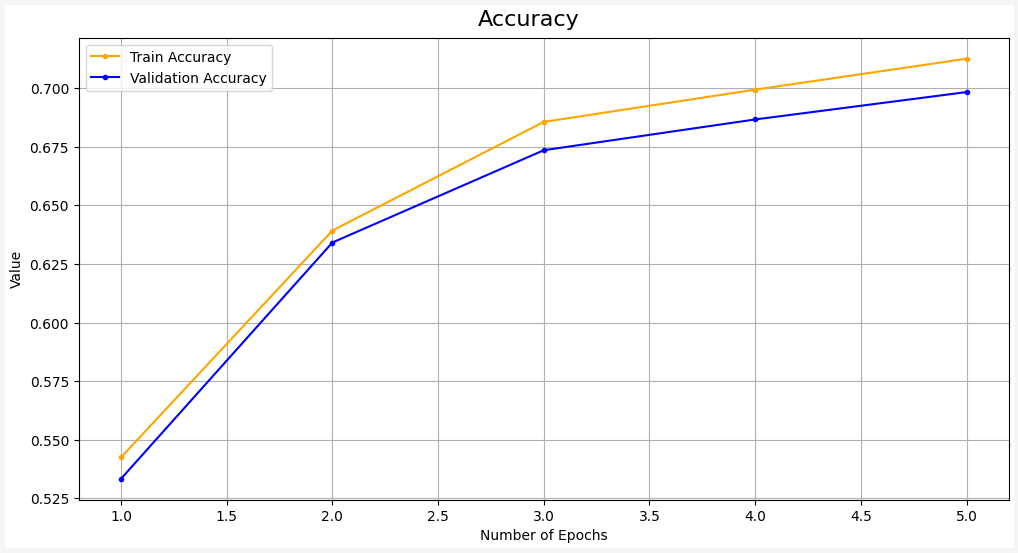

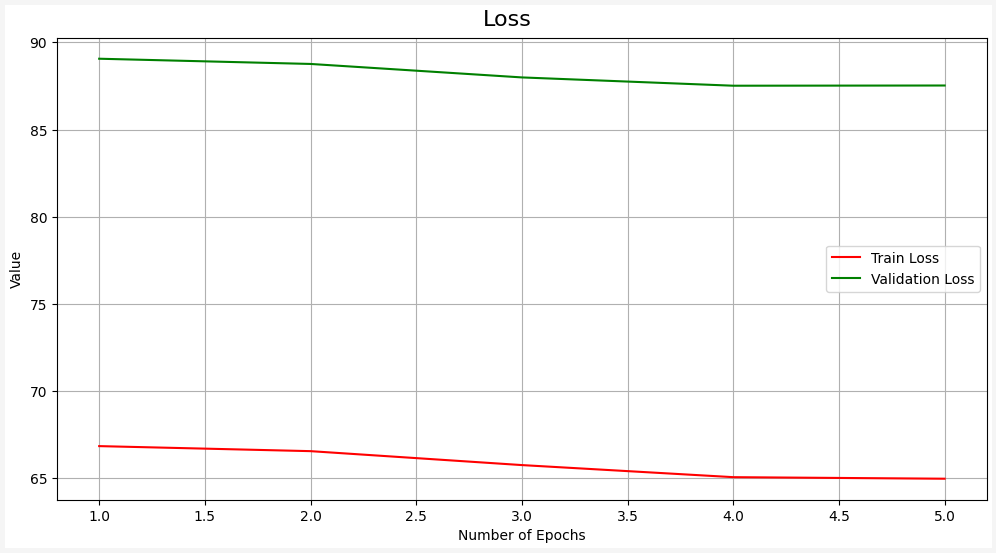

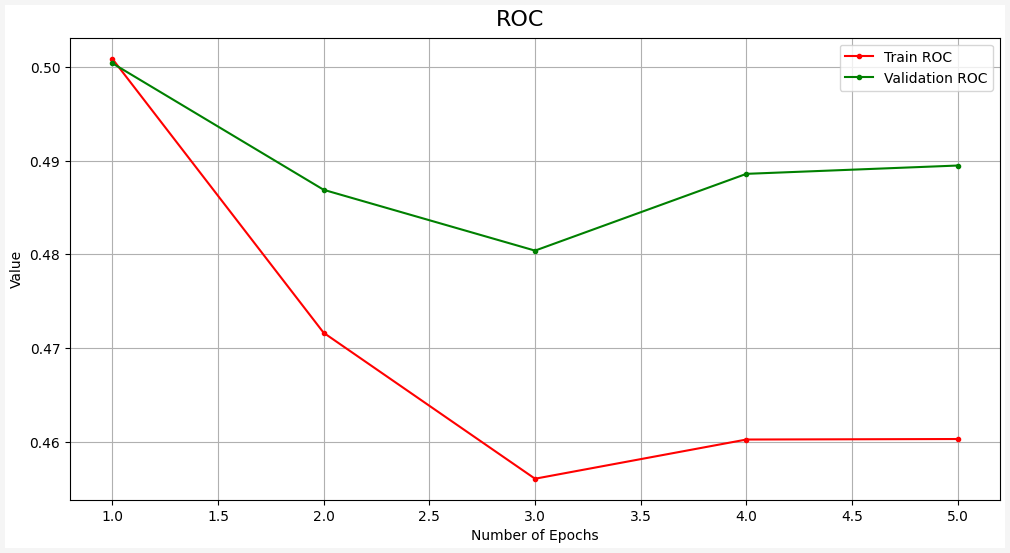

In [100]:
display_train_curve (list_train_acc, list_val_acc, list_train_loss, list_val_loss, list_train_roc, list_val_roc, evaluate_GCN.n_epochs)

In [101]:
test_acc, test_loss, roc_test_score, logits_test = evaluate_GCN.test(graph.subgraph(test_idx))

In [102]:
test_acc, test_loss, roc_test_score

(0.6885253190994263, tensor(11.4503), 0.4916790936541707)

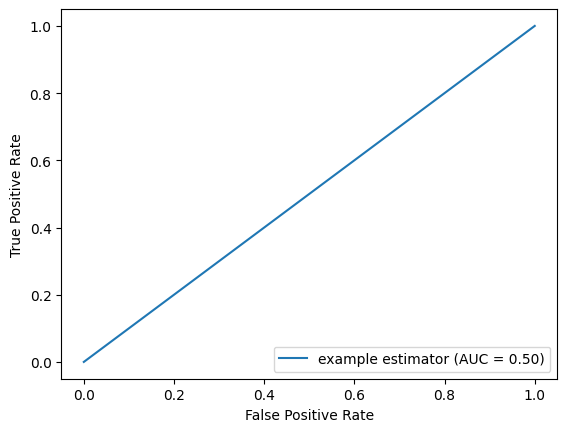

In [103]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(graph.subgraph(test_idx).ndata['labels'][:,0], logits_test[:,0])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')
display.plot()
plt.show()

task  93


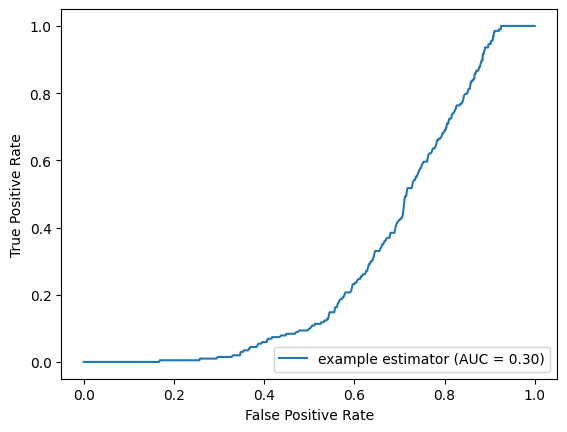

task  52


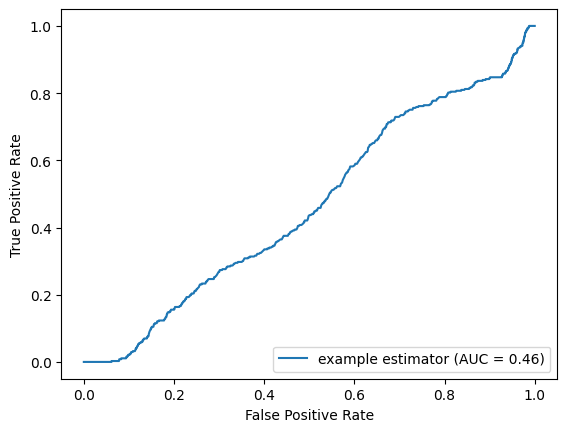

task  82


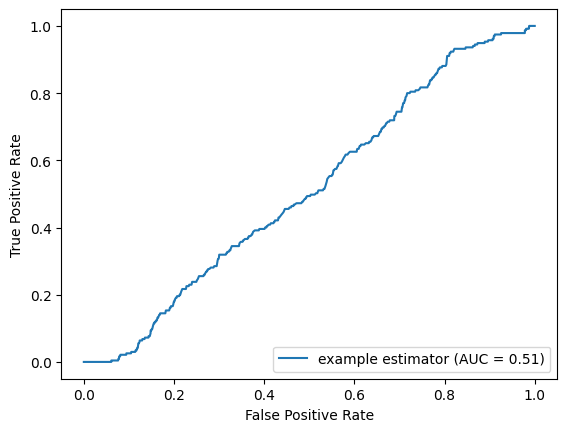

task  71


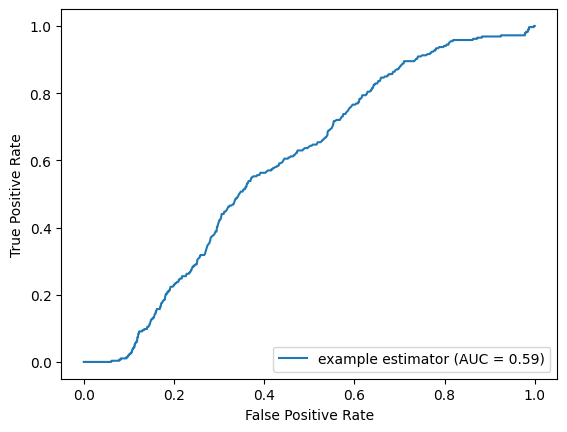

task  64


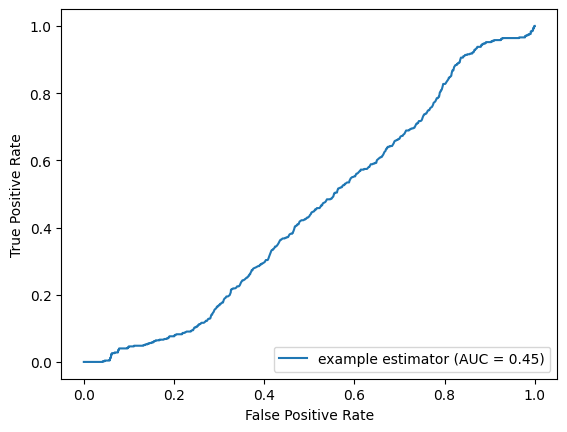

task  58


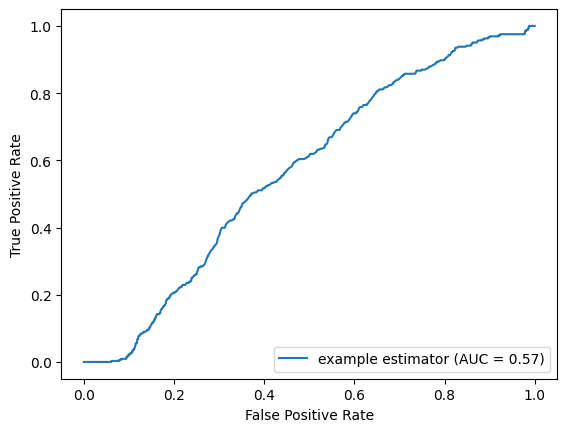

task  49


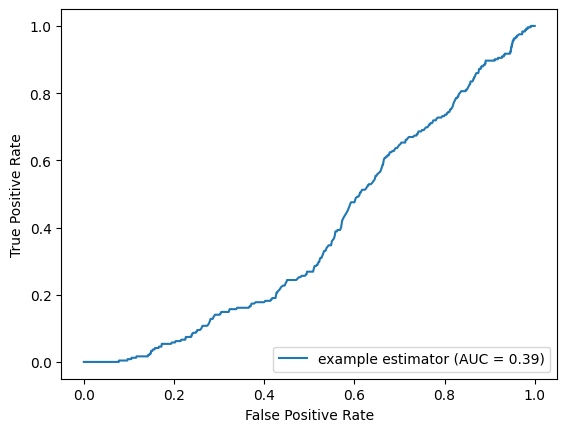

task  68


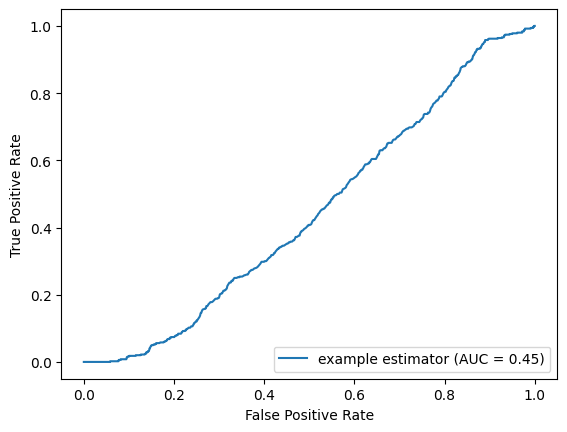

task  27


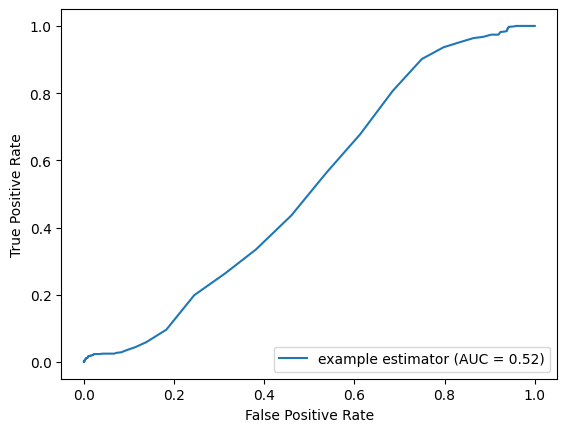

task  76


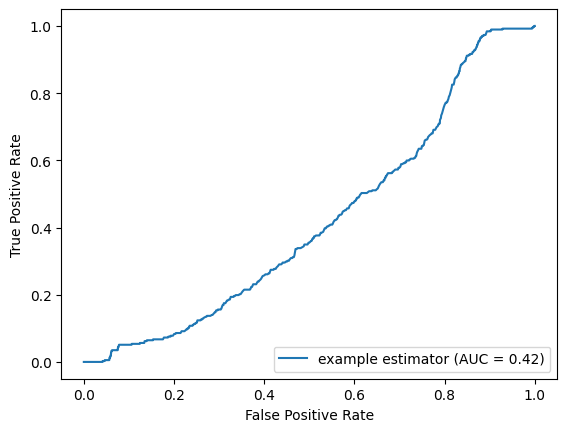

In [104]:
for i in np.random.randint(1,high= 112, size=10):
    print("task ", i)
    fpr, tpr, thresholds = metrics.roc_curve(graph.subgraph(test_idx).ndata['labels'][:,i], logits_test[:,i])
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                    estimator_name='example estimator')
    display.plot()
    plt.show()